In [1]:
## data cleaning and exploration
## data exploration/ exploratory analysis - univariate, multi variate, PCA
## build model
## output

## improvise:
## use exploration results
## visualize exploration results
## feature selection
## missing value replacement

## problems to tackle:
## feature selection: bmi can be dropped (find independent variables)
## class imbalance between accepted and denied - overfitting/ underfitting

### Problem Apparoach
##### Step 1
1. data cleaning and exploration
2. data exploration - exploratory analysis - univariate, multi variate, PCA
3. build model
4. output

##### Step 2 - Improvise
1. Use exploration resuslts
2. visualize exploration results
3. feature selection
4. missing value replacement

##### Problems to tackle
1. feature selection: bmi can be dropped (find independent variables)
2. overfitting/ underfitting (class imbalance)


##### Thoughts
1. Pick accepted and denied classes, rest no need for training
2. Some BMI values are incorrect assuming height and weight are correct. Height in cm, weight in kg
3. Maybe create new features from the existing ones?
4. BMI formula: bmi = w / ((h/100)*(h/100))
5. for visualizations, get rid of Nans

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import speedml

from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [51]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [52]:
## read csv file, format columns, remove unnecessary column
df = pd.read_csv('TestData_v2.csv')
df.columns = df.columns.str.replace(' ', '')
df.drop(['Unnamed:0'], axis=1, inplace=True)
# df.PatientID = df.PatientID.astype('int')

In [ ]:
df.PatientID = df.PatientID.astype('int')

In [53]:
## drop rows with all Nan values
df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

In [54]:
df = df[df['Label'].isin(['Accepted', 'Denied'])]
# replace_map = {'Label': {'Denied': 0, 'Accepted': 1}}
# labels = df['Label'].astype('category').cat.categories.tolist()
# replace_map_comp = {'Label' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
# df_replace = df.copy()
# df_replace.replace(replace_map_comp, inplace=True)

In [38]:
replace_map_comp

{'Label': {'Accepted': 1, 'Denied': 2}}

In [6]:
df.shape

(636, 55)

In [32]:
df_replace.head(100)

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label,LabelID
0,168.1,NaN,NaN,73.90,one,one,NaN,NaN,NaN,NaN,one,one,one,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00,NaN,17.00,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3956543.0,1,0
1,172.1,65.7,22.0,85.00,one,one,NaN,NaN,144.0,NaN,NaN,zero,one,NaN,NaN,7500.0,482.0,13.00,45.5,94.0,30.7,32.5,28.3,12.00,NaN,12.00,21.0,172.0,268.0,0.30,9.9,0.87,NaN,83.00,54.0,130.0,7.90,NaN,49.0,4.6,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,0.005,NaN,3964292.0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965820.0,1,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965847.0,1,0
5,174.8,74.3,NaN,86.00,NaN,NaN,NaN,NaN,NaN,NaN,one,NaN,NaN,NaN,NaN,7100.0,560.0,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3967976.0,1,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3968855.0,1,0
7,NaN,NaN,23.0,80.40,one,zero,4.59,NaN,NaN,one,NaN,zero,one,NaN,5.0,NaN,NaN,14.00,NaN,NaN,NaN,NaN,22.4,30.00,NaN,28.00,2.0,190.0,NaN,NaN,NaN,NaN,63.1,47.00,NaN,173.0,NaN,NaN,56.0,7.9,one,one,NaN,one,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978258.0,2,1
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978282.0,1,0
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978288.0,1,0
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978292.0,1,0


In [6]:
##convert categorical variables into string or category codes - str or int 
## all object dtypes into str
df.Label = df.Label.astype('category')
df['LabelID'] = df.Label.cat.codes

In [28]:
df.head(100)

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label,LabelID
0,168.1,NaN,NaN,73.90,one,one,NaN,NaN,NaN,NaN,one,one,one,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00,NaN,17.00,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3956543.0,Accepted,0
1,172.1,65.7,22.0,85.00,one,one,NaN,NaN,144.0,NaN,NaN,zero,one,NaN,NaN,7500.0,482.0,13.00,45.5,94.0,30.7,32.5,28.3,12.00,NaN,12.00,21.0,172.0,268.0,0.30,9.9,0.87,NaN,83.00,54.0,130.0,7.90,NaN,49.0,4.6,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,0.005,NaN,3964292.0,Accepted,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965820.0,Accepted,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965847.0,Accepted,0
5,174.8,74.3,NaN,86.00,NaN,NaN,NaN,NaN,NaN,NaN,one,NaN,NaN,NaN,NaN,7100.0,560.0,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3967976.0,Accepted,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3968855.0,Accepted,0
7,NaN,NaN,23.0,80.40,one,zero,4.59,NaN,NaN,one,NaN,zero,one,NaN,5.0,NaN,NaN,14.00,NaN,NaN,NaN,NaN,22.4,30.00,NaN,28.00,2.0,190.0,NaN,NaN,NaN,NaN,63.1,47.00,NaN,173.0,NaN,NaN,56.0,7.9,one,one,NaN,one,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978258.0,Denied,1
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978282.0,Accepted,0
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978288.0,Accepted,0
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978292.0,Accepted,0


In [55]:
cat_columns = ['FourKHz', 'OneKHz', 'UrineProtein', 'UrineSugar', 'Urobilinogen', 'OccultBlood', 'Ketones', 'HBAntigen',
               'TPHA', 'HCVAntibody', 'Label']

for col in cat_columns:
    df[col] = df[col].astype('category')    
    print(col, dict(enumerate(df[col].cat.categories)))
    df[col] = df[col].cat.codes
    
#     df[str(col)] = pd.Categorical(df[str(col)])
#     df[str(col)] = df[str(col)].cat.codes
    
#     key_map = dict(enumerate(df[col].cat.categories))
#     key_map.update({0: 'zero', 1: 'one'})
#     print(key_map)
#     df.replace({col: key_map}, inplace=True)
#     df['mycol_codes'] = df['mycol'].cat.codes
#     df['mycol_reversed'] = df['mycol_codes'].map(d)

FourKHz {0: 'one', 1: 'zero'}
OneKHz {0: 'one', 1: 'zero'}
UrineProtein {0: 'one', 1: 'zero'}
UrineSugar {0: 'one', 1: 'zero'}
Urobilinogen {0: 'one', 1: 'zero'}
OccultBlood {0: 'one', 1: 'zero'}
Ketones {0: 'one', 1: 'zero'}
HBAntigen {0: 'one'}
TPHA {0: 'one'}
HCVAntibody {0: 'one', 1: 'zero'}
Label {0: 'Accepted', 1: 'Denied'}


In [17]:
## calculate or update BMI
# df['BMI'] = df['Weight'] / ((df['Height']/100) * (df['Height']/100))
# df['BMI'] = df.apply(
#     lambda row: row['Weight']/((row['Height']/100)*(row['Height']/100)) if np.isnan(row['BMI']) else row['BMI'],
#     axis=1
# )

In [9]:
df.groupby('Label').describe()

Height                                                               \
          count        mean       std    min      25%    50%      75%    max   
Label                                                                          
Accepted   99.0  169.282828  8.882051  119.0  166.500  170.0  173.100  190.0   
Denied     32.0  169.362500  7.773352  157.2  161.875  170.0  175.025  183.6   

         Weight                                                              \
          count       mean        std   min     25%    50%       75%    max   
Label                                                                         
Accepted   99.0  70.705354  45.404214  22.0  57.800  64.00  72.30000  480.0   
Denied     24.0  83.179792  67.457047  22.0  54.625  65.85  85.12875  373.0   

           BMI                                                     \
         count       mean       std   min   25%   50%   75%   max   
Label                                                               
Accepted  79.0  23.592532  4.971887  13.5  20.9  23.0  25.0  40.7   
Denied    33.0  22.978788  3.778869  17.2  20.1  22.5  25.5  32.1   

         AbdominalCircumference                                           \
                          count       mean        std   min    25%   50%   
Label                                                                      
Accepted                   69.0  83.168261  16.503291  39.0  81.00  84.9   
Denied                     19.0  87.021053  17.492684  35.3  83.45  85.0   

                      VitalCapacity                                            \
           75%    max         count      mean       std  min  25%   50%   75%   
Label                                                                           
Accepted  85.0  185.0          19.0  2.731053  1.622782  1.0  1.0  3.00  4.12   
Denied    91.5  130.0          17.0  2.967059  2.063067  1.0  1.0  2.64  4.28   

               BloodPressureSecond                                           \
           max               count       mean        std   min    25%   50%   
Label                                                                         
Accepted  5.15                48.0  79.368750  17.298237  31.7  69.75  80.0   
Denied    7.00                11.0  73.454545   8.201995  57.0  69.50  76.0   

                       BloodPressureFirst              ...   Lym         TTT  \
            75%    max              count        mean  ...   75%   max count   
Label                                                  ...                     
Accepted  84.25  147.0               59.0  113.374576  ...  33.1  51.9  23.0   
Denied    79.50   84.0               18.0  108.911111  ...  28.9  71.0   9.0   

                                                      RightEyeCorrection  \
              mean       std  min  25%  50%  75%  max              count   
Label                                                                      
Accepted  3.139130  2.147459  1.0  1.0  3.0  4.5  8.4               51.0   
Denied    2.055556  1.628735  1.0  1.0  1.0  2.0  5.5               14.0   

                                                        Prostate            \
              mean       std  min   25%  50%   75%  max    count      mean   
Label                                                                        
Accepted  1.984314  2.219132  0.2  0.85  1.0  1.75  9.0     34.0  1.251382   
Denied    2.128571  1.884932  0.3  1.00  1.6  2.75  7.0     35.0  1.063000   

                                                  LeftEyeCorrection            \
               std    min   25%  50%     75%  max             count      mean   
Label                                                                           
Accepted  0.826867  0.005  0.81  1.0  1.2875  3.0              51.0  1.733333   
Denied    0.712109  0.295  0.59  1.0  1.1315  3.0              14.0  1.957143   

                                                PatientID                \
               std  min   25%

In [10]:
df.groupby('Label').describe()

Height                                                               \
          count        mean       std    min      25%    50%      75%    max   
Label                                                                          
Accepted   99.0  169.282828  8.882051  119.0  166.500  170.0  173.100  190.0   
Denied     32.0  169.362500  7.773352  157.2  161.875  170.0  175.025  183.6   

         Weight                                                              \
          count       mean        std   min     25%    50%       75%    max   
Label                                                                         
Accepted   99.0  70.705354  45.404214  22.0  57.800  64.00  72.30000  480.0   
Denied     24.0  83.179792  67.457047  22.0  54.625  65.85  85.12875  373.0   

           BMI                                                     \
         count       mean       std   min   25%   50%   75%   max   
Label                                                               
Accepted  79.0  23.592532  4.971887  13.5  20.9  23.0  25.0  40.7   
Denied    33.0  22.978788  3.778869  17.2  20.1  22.5  25.5  32.1   

         AbdominalCircumference                                           \
                          count       mean        std   min    25%   50%   
Label                                                                      
Accepted                   69.0  83.168261  16.503291  39.0  81.00  84.9   
Denied                     19.0  87.021053  17.492684  35.3  83.45  85.0   

                      VitalCapacity                                            \
           75%    max         count      mean       std  min  25%   50%   75%   
Label                                                                           
Accepted  85.0  185.0          19.0  2.731053  1.622782  1.0  1.0  3.00  4.12   
Denied    91.5  130.0          17.0  2.967059  2.063067  1.0  1.0  2.64  4.28   

               BloodPressureSecond                                           \
           max               count       mean        std   min    25%   50%   
Label                                                                         
Accepted  5.15                48.0  79.368750  17.298237  31.7  69.75  80.0   
Denied    7.00                11.0  73.454545   8.201995  57.0  69.50  76.0   

                       BloodPressureFirst              ...   Lym         TTT  \
            75%    max              count        mean  ...   75%   max count   
Label                                                  ...                     
Accepted  84.25  147.0               59.0  113.374576  ...  33.1  51.9  23.0   
Denied    79.50   84.0               18.0  108.911111  ...  28.9  71.0   9.0   

                                                      RightEyeCorrection  \
              mean       std  min  25%  50%  75%  max              count   
Label                                                                      
Accepted  3.139130  2.147459  1.0  1.0  3.0  4.5  8.4               51.0   
Denied    2.055556  1.628735  1.0  1.0  1.0  2.0  5.5               14.0   

                                                        Prostate            \
              mean       std  min   25%  50%   75%  max    count      mean   
Label                                                                        
Accepted  1.984314  2.219132  0.2  0.85  1.0  1.75  9.0     34.0  1.251382   
Denied    2.128571  1.884932  0.3  1.00  1.6  2.75  7.0     35.0  1.063000   

                                                  LeftEyeCorrection            \
               std    min   25%  50%     75%  max             count      mean   
Label                                                                           
Accepted  0.826867  0.005  0.81  1.0  1.2875  3.0              51.0  1.733333   
Denied    0.712109  0.295  0.59  1.0  1.1315  3.0              14.0  1.957143   

                                                PatientID                \
               std  min   25%

In [56]:
accepted = df[df['Label'] == 0]
denied = df[df['Label'] == 1]
# pending = df[df['Label'] == 'Pending']
# referred = df[df['Label'] == 'Referred']

In [57]:
accepted_per = round(len(accepted.Label)/(len(accepted.Label)+len(denied.Label)), 2)
denied_per = round(len(denied.Label)/(len(accepted.Label)+len(denied.Label)), 2)
# denied_per = denied.count()/(accepted.count()+denied.count())

In [58]:
print(accepted_per)
print(denied_per)

## classes are imbalanced

0.72
0.28


In [31]:
df.groupby('Label').mean()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,169.282828,70.705354,23.592532,83.168261,-0.681223,-0.681223,2.731053,79.368750,113.374576,-0.788210,-0.836245,-0.805677,-0.674672,-0.956332,5.181635,6043.183673,457.244186,13.584896,44.312000,93.100000,30.962712,33.518182,28.733000,20.367756,11.802632,23.794480,35.289154,172.874516,219.672131,1.063475,14.893939,0.887789,78.006176,65.527923,105.455000,111.786296,6.739118,1.494000,69.545455,4.973165,-0.901747,-0.941048,0.144167,-0.882096,5.405849,94.171642,100.058824,21.550278,23.603448,3.139130,1.984314,1.251382,1.733333,4.018137e+06
1,169.362500,83.179792,22.978788,87.021053,-0.561798,-0.522472,2.967059,73.454545,108.911111,-0.870787,-0.898876,-0.825843,-0.713483,-0.904494,5.539286,6040.000000,390.916667,12.064706,42.741667,93.107143,34.812121,31.366061,28.157576,25.048718,10.232069,21.265625,35.322507,182.571429,202.244828,1.317667,14.975000,0.789574,75.422222,68.115385,119.615152,119.727273,6.800000,1.621333,71.666667,4.373333,-0.848315,-0.859551,0.105947,-0.797753,6.011053,105.826087,98.873684,17.880000,22.786667,2.055556,2.128571,1.063000,1.957143,4.020214e+06


In [32]:
denied.describe()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
count,32.000000,24.000000,33.000000,19.000000,178.000000,178.000000,17.000000,11.000000,18.000000,178.000000,178.000000,178.000000,178.000000,178.000000,28.000000,14.000000,36.000000,34.000000,36.000000,28.000000,33.000000,33.000000,33.000000,78.000000,29.000000,64.000000,73.000000,21.000000,29.000000,30.000000,4.000000,47.000000,18.000000,52.000000,33.000000,44.000000,13.000000,15.000000,15.000000,30.000000,178.000000,178.000000,19.000000,178.000000,19.000000,23.000000,19.000000,10.000000,15.000000,9.000000,14.000000,35.000000,14.000000,1.780000e+02,178.0
mean,169.362500,83.179792,22.978788,87.021053,-0.561798,-0.522472,2.967059,73.454545,108.911111,-0.870787,-0.898876,-0.825843,-0.713483,-0.904494,5.539286,6040.000000,390.916667,12.064706,42.741667,93.107143,34.812121,31.366061,28.157576,25.048718,10.232069,21.265625,35.322507,182.571429,202.244828,1.317667,14.975000,0.789574,75.422222,68.115385,119.615152,119.727273,6.800000,1.621333,71.666667,4.373333,-0.848315,-0.859551,0.105947,-0.797753,6.011053,105.826087,98.873684,17.880000,22.786667,2.055556,2.128571,1.063000,1.957143,4.020214e+06,1.0
std,7.773352,67.457047,3.778869,17.492684,0.712361,0.722559,2.063067,8.201995,31.110768,0.397933,0.320485,0.496320,0.593694,0.294741,2.181291,1515.392815,184.324772,3.638172,5.604660,11.654499,16.114430,4.836632,17.894396,20.117814,17.287567,14.329304,30.230007,53.305320,81.937492,0.908833,5.286067,0.179600,11.048905,30.769640,80.400832,39.419251,0.921954,0.733474,29.851218,2.792222,0.359728,0.348433,0.102891,0.402809,1.790837,51.546671,26.296025,8.579666,16.265953,1.628735,1.884932,0.712109,3.157339,1.390724e+04,0.0
min,157.200000,22.000000,17.200000,35.300000,-1.000000,-1.000000,1.000000,57.000000,39.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.000000,3800.000000,53.000000,5.500000,29.000000,76.000000,24.000000,12.780000,10.400000,1.000000,1.000000,4.000000,1.000000,45.000000,21.000000,0.200000,9.700000,0.300000,55.900000,31.000000,30.000000,58.000000,4.000000,1.000000,37.000000,1.000000,-1.000000,-1.000000,0.010000,-1.000000,3.000000,75.000000,36.000000,3.000000,8.100000,1.000000,0.300000,0.295000,0.100000,3.978258e+06,1.0
25%,161.875000,54.625000,20.100000,83.450000,-1.000000,-1.000000,1.000000,69.500000,85.525000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,5125.000000,300.500000,8.000000,40.675000,88.950000,29.000000,31.000000,21.000000,13.250000,4.000000,11.325000,13.000000,155.000000,152.000000,0.727500,11.800000,0.700000,67.700000,44.750000,61.000000,95.250000,6.800000,1.200000,51.500000,1.000000,-1.000000,-1.000000,0.031000,-1.000000,5.200000,88.500000,89.000000,10.900000,10.900000,1.000000,1.000000,0.590000,0.300000,4.013091e+06,1.0
50%,170.000000,65.850000,22.500000,85.000000,-1.000000,-1.000000,2.640000,76.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.250000,5950.000000,467.000000,13.200000,43.400000,90.350000,31.000000,32.700000,23.800000,21.500000,4.300000,18.000000,26.100000,183.000000,201.100000,1.000000,14.100000,0.780000,78.650000,61.500000,99.000000,118.000000,7.000000,1.500000,63.000000,5.200000,-1.000000,-1.000000,0.100000,-1.000000,5.600000,98.000000,99.000000,19.950000,18.900000,1.000000,1.600000,1.000000,1.000000,4.016826e+06,1.0
75%,175.025000,85.128750,25.500000,91.500000,0.000000,0.000000,4.280000,79.500000,129.750000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6.000000,6925.000000,515.250000,14.850000,45.925000,96.000000,33.200000,34.0

In [59]:
df.dropna(axis=0,how='all').corr()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
Height,1.000000,-0.050665,0.244780,0.123273,0.108766,-0.084090,0.370360,-0.076388,0.172352,0.015094,0.109490,0.117109,0.024114,0.035839,-0.091046,-0.218024,-0.020743,0.009059,0.124206,0.015163,0.170853,-0.003226,0.041496,-0.123504,0.105023,0.036258,0.037145,0.009464,0.364937,-0.172791,0.099864,0.192969,0.400038,0.061926,0.250832,0.062690,-0.256852,-0.251284,0.310671,-0.108590,0.074093,-0.000584,0.069382,0.104158,-0.069119,0.119897,0.260345,-0.542643,0.551832,-0.097065,-0.261297,0.019249,-0.134093,-0.052677,0.003998
Weight,-0.050665,1.000000,0.066717,0.107484,-0.029099,-0.020220,-0.557419,0.047578,0.317511,0.076631,0.130925,0.004450,0.120912,-0.054052,0.427989,0.063247,-0.075466,0.299568,0.217418,0.084961,0.288265,0.183617,0.099383,0.112846,-0.028537,0.163383,-0.004681,-0.099391,-0.330227,-0.119629,-0.290107,0.170778,-0.029885,-0.083197,-0.033764,-0.129949,0.103642,-0.424955,0.176795,-0.012329,0.090268,-0.058570,0.590732,-0.105037,-0.073127,-0.159455,-0.002492,-0.284654,-0.290469,-0.002163,0.309241,-0.134928,-0.036135,0.111693,0.098520
BMI,0.244780,0.066717,1.000000,0.025686,-0.051682,-0.072697,-0.607948,-0.050847,0.177024,0.116227,0.163707,-0.015497,0.113115,-0.102134,-0.085758,0.143424,0.282630,0.398879,0.096663,-0.114352,-0.186027,0.000338,-0.045588,0.202200,-0.222545,0.020603,0.207888,-0.094914,0.098328,-0.021826,-0.148254,0.067157,-0.239403,-0.124253,0.387642,0.278995,-0.078435,-0.341561,0.141971,0.149867,-0.057487,0.075685,-0.167537,-0.074334,0.070244,-0.179855,0.362272,-0.055098,-0.208515,-0.367055,0.023946,-0.180366,0.173637,0.037542,-0.060520
AbdominalCircumference,0.123273,0.107484,0.025686,1.000000,0.096517,0.098526,0.164810,0.250138,-0.330194,0.077306,0.244301,0.044964,0.134636,0.034637,-0.110263,0.581683,-0.042135,0.032636,-0.021723,-0.148162,-0.085044,0.078125,-0.031731,0.185109,-0.284823,-0.048791,-0.031819,-0.100651,0.185161,-0.276860,-0.301291,0.017038,0.046511,-0.003208,0.084808,0.160054,-0.018517,-0.336476,-0.566184,-0.114146,0.127288,0.153056,0.637148,0.031030,-0.043118,0.167253,-0.047309,0.126899,-0.064122,-0.130758,-0.142201,0.222035,-0.250738,0.118633,0.095496
FourKHz,0.108766,-0.029099,-0.051682,0.096517,1.000000,0.766173,-0.115525,0.028987,-0.043468,0.109232,0.198883,0.296875,0.104167,0.181802,0.046681,-0.036310,-0.074730,0.162918,-0.001493,-0.111527,0.016754,0.196623,-0.014050,0.114559,0.231880,0.070144,0.131596,-0.034012,-0.026953,0.045279,-0.199672,-0.026742,0.115026,0.078320,0.066967,0.135370,0.023496,-0.022875,-0.205627,0.328443,0.304693,0.246072,0.145604,0.271122,-0.093631,0.034940,-0.101022,-0.125294,0.428725,0.355597,0.008180,0.199706,0.087101,0.051320,0.083042
OneKHz,-0.084090,-0.020220,-0.072697,0.098526,0.766173,1.000000,-0.157570,0.061523,-0.070046,0.101831,0.143822,0.315963,0.062127,0.256698,0.108894,0.019540,-0.111701,0.185587,-0.076781,-0.121602,0.023568,0.136104,0.051121,0.100628,0.263083,0.021250,0.185103,0.081371,-0.213243,0.031812,-0.131767,-0.053665,0.147593,0.060954,-0.046925,0.202754,-0.081706,0.063614,-0.322425,0.348743,0.273492,0.274479,0.211982,0.255474,-0.068806,0.128718,-0.118635,0.198227,0.442846,0.428214,-0.046382,0.082352,0.034314,0.031762,0.109566
VitalCapacity,0.370360,-0.557419,-0.607948,0.164810,-0.115525,-0.157570,1.000000,-0.404796,0.172449,0.055459,0.285134,0.100200,0.035038,-0.101939,-0.242688,-0.697027,-0.143166,-0.131137,0.056166,0.013197,0.123463,0.071189,-0.119108,-0.161477,0.419745,0.073892,-0.182990,-0.194565,0.143489,-0.310092,0.087045,0.00732

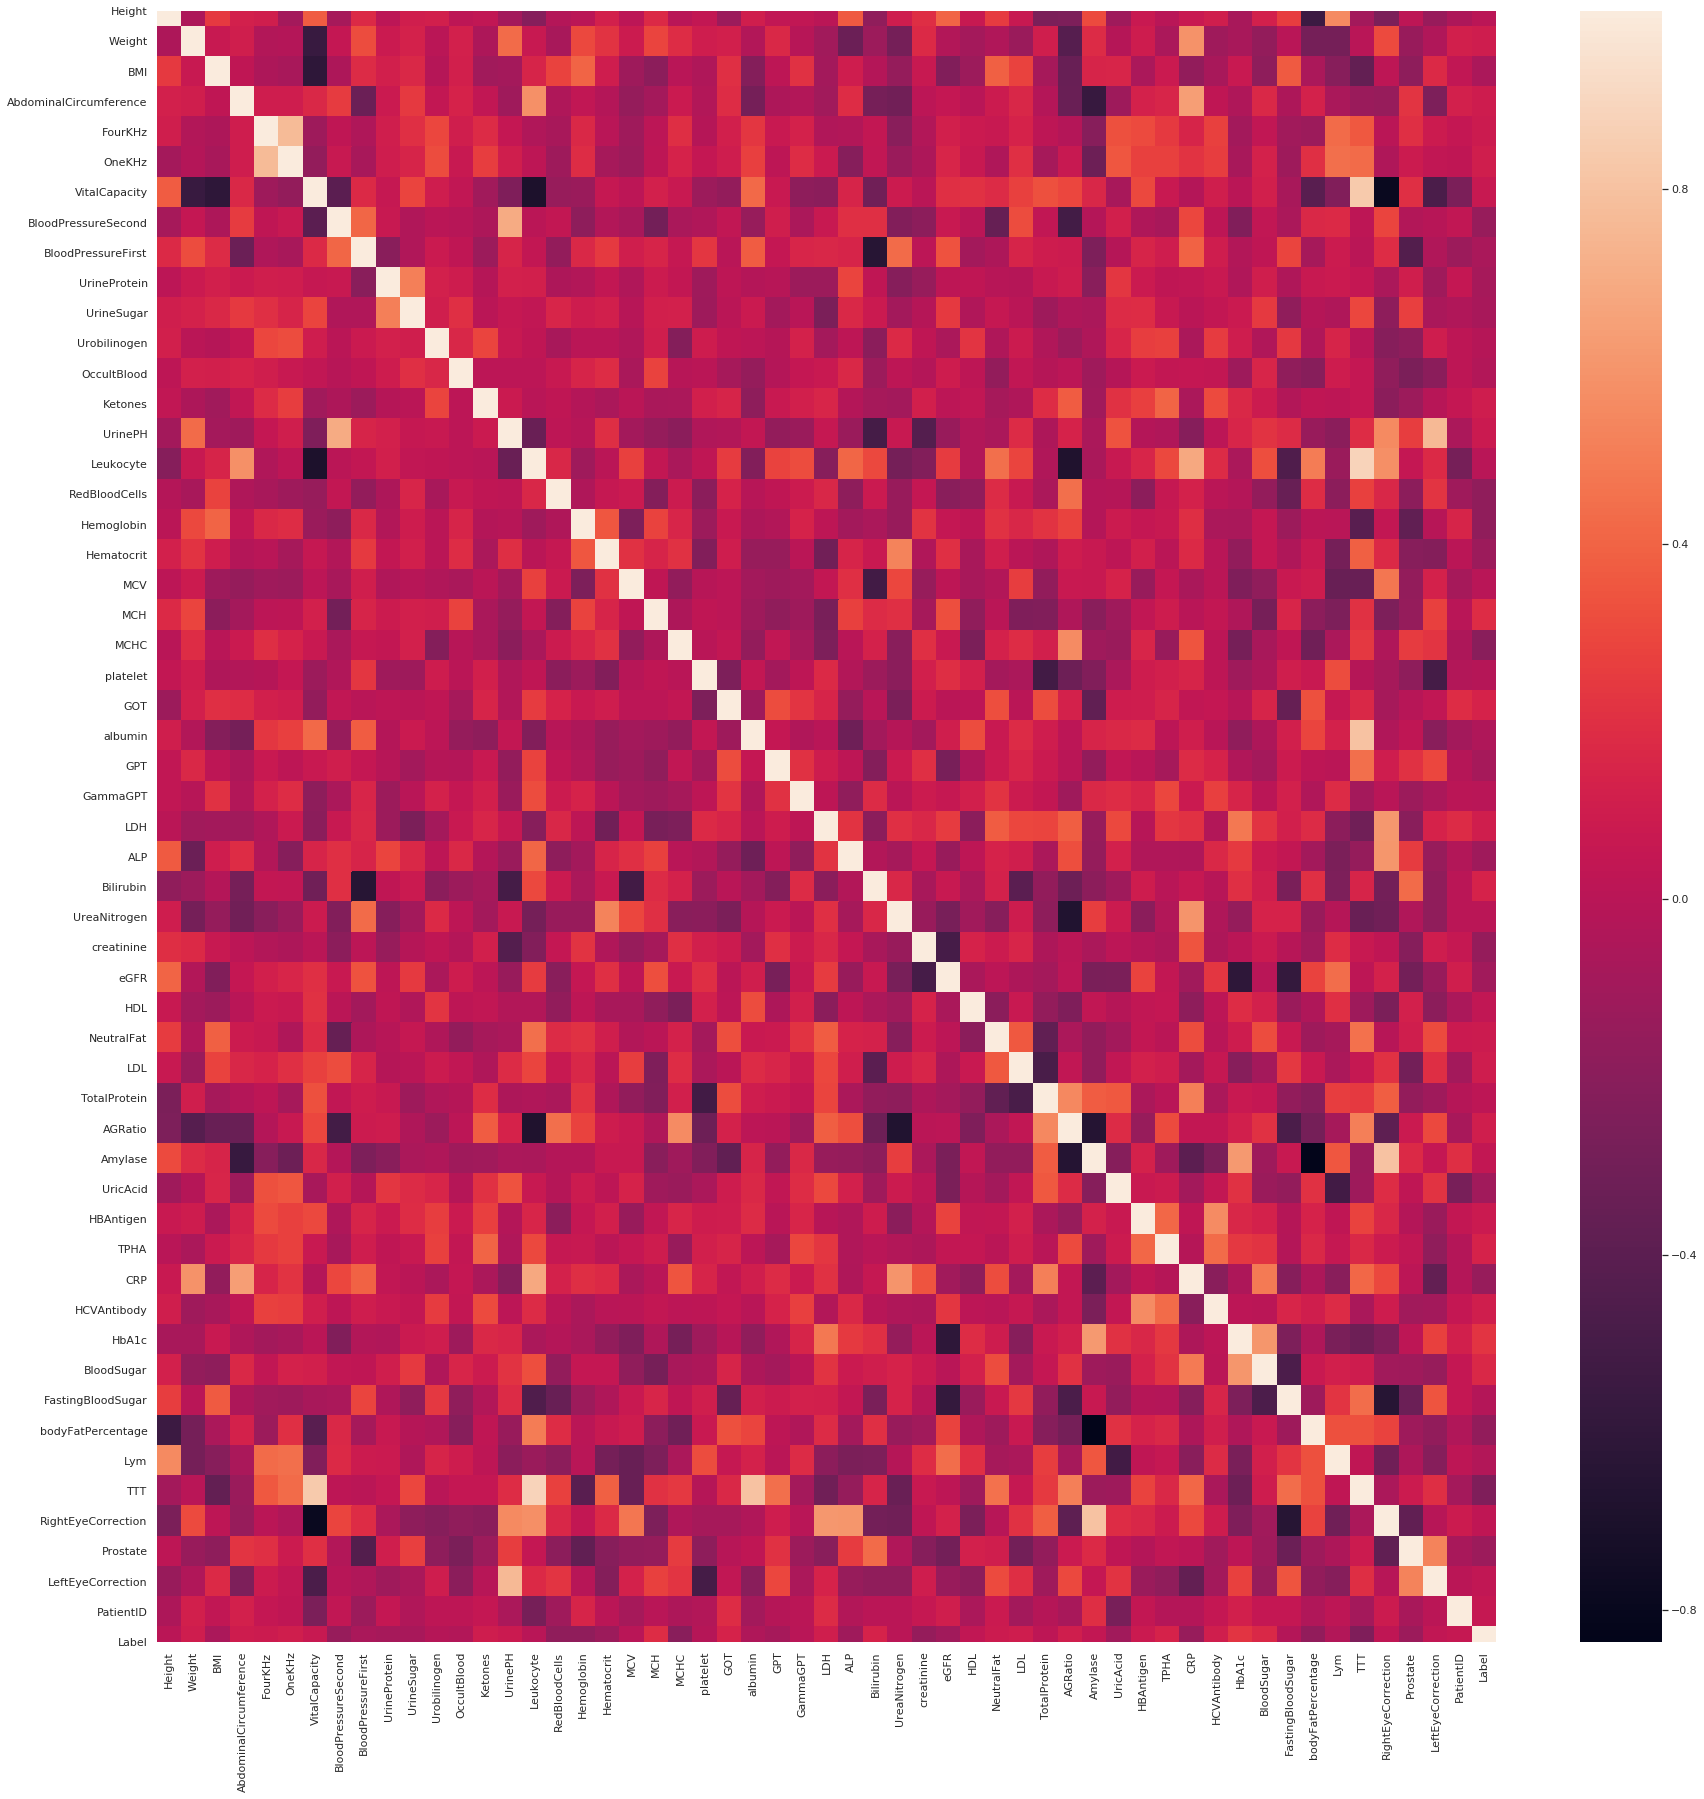

In [60]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df.dropna(axis=0, how='all').corr(), ax=ax)
plt.show()

# plt.figure(figsize=(30,30))
# sns.heatmap(df.corr());

In [45]:
### TTT strongly correlated to Vital Capacity, Leukocyte, albumin, FourKHz, OneKHz
### FourKHz and OneKHz strongly correlated
## ['FourKHz', 'OneKHz', 'UrineProtein', 'UrineSugar', 'Urobilinogen', 'OccultBlood', 'Ketones', 'HBAntigen',
#                'TPHA', 'HCVAntibody', 'Label']
df.groupby('FourKHz').describe()

Height                                                               \
         count        mean        std    min    25%     50%      75%    max   
FourKHz                                                                       
-1        56.0  168.073214  10.385015  119.0  164.5  169.45  173.450  185.6   
 0        42.0  170.240476   7.131143  155.5  166.5  170.10  174.025  190.0   
 1        33.0  170.193939   6.708620  151.9  167.7  171.20  174.300  184.7   

        Weight                                                        BMI  \
         count       mean        std   min   25%   50%   75%    max count   
FourKHz                                                                     
-1        47.0  74.040745  51.141128  22.0  54.7  65.0  75.5  373.0  46.0   
 0        47.0  74.287872  61.313310  51.0  59.4  64.0  71.2  480.0  30.0   
 1        29.0  69.817241  23.934003  41.0  57.5  64.0  71.9  160.7  36.0   

                                                                 \
              mean       std   min     25%    50%     75%   max   
FourKHz                                                           
-1       23.495652  5.649541  13.5  19.450  22.10  25.000  40.7   
 0       23.913333  3.931810  18.2  21.850  23.25  25.350  34.6   
 1       22.886389  3.747210  13.5  20.975  22.40  25.925  29.5   

        AbdominalCircumference                                             \
                         count       mean        std   min     25%    50%   
FourKHz                                                                     
-1                        30.0  83.680333  17.881463  35.3  84.000  85.00   
 0                        32.0  81.090625   9.842415  39.0  80.150  84.05   
 1                        26.0  87.950000  21.254745  65.0  84.225  85.00   

                      OneKHz                                               \
           75%    max  count      mean       std  min  25%  50%  75%  max   
FourKHz                                                                     
-1       86.85  130.0  472.0 -0.904661  0.353057 -1.0 -1.0 -1.0 -1.0  1.0   
 0       85.00  100.0  104.0 -0.173077  0.471361 -1.0  0.0  0.0  0.0  1.0   
 1       89.90  185.0   60.0  0.666667  0.705106 -1.0  1.0  1.0  1.0  1.0   

        VitalCapacity                                                   \
                count      mean       std  min   25%   50%   75%   max   
FourKHz                                                                  
-1               11.0  3.619091  2.156638  1.0  1.82  4.00  4.62  7.00   
 0               10.0  1.763000  1.300769  1.0  1.00  1.00  2.50  4.59   
 1               15.0  2.992667  1.595460  1.0  1.00  3.86  4.25  5.15   

        BloodPressureSecond             ...     Lym         TTT            \
                      count       mean  ...     75%   max count      mean   
FourKHz                                 ...                                 
-1                     27.0  76.618519  ...  19.725  51.9  17.0  2.411765   
 0                     12.0  83.666667  ...  32.600  38.2   8.0  2.312500   
 1                     20.0  77.250000  ...  41.500  71.0   7.0  4.457143   

                                              RightEyeCorrection            \
              std  min   25%   50%   75%  max              count      mean   
FourKHz                                                                      
-1       1.872793  1.0  1.00  2.00  3.00  7.0               29.0  1.775862   
 0       1.533844  1.0  1.00  1.75  3.25  5.0               17.0  2.776471   
 1       2.381776  1.0  3.15  5.00  5.25  8.4               19.0  1.700000   

                                             Prostate                      \
              std  min   25%  50%   75%  max    count      mean       std   
FourKHz                                                                     
-1       1.948196  0.3  0.60  1.0  2.00  7.0     35.0  1.020143  0.532130   
 0       2.542767  0.2  1.00  1.2  4.00  8.0     20.0  1

In [36]:
df.groupby('Label').describe()

Height                                                               \
       count        mean       std    min      25%    50%      75%    max   
Label                                                                       
0       99.0  169.282828  8.882051  119.0  166.500  170.0  173.100  190.0   
1       32.0  169.362500  7.773352  157.2  161.875  170.0  175.025  183.6   

      Weight                                                              \
       count       mean        std   min     25%    50%       75%    max   
Label                                                                      
0       99.0  70.705354  45.404214  22.0  57.800  64.00  72.30000  480.0   
1       24.0  83.179792  67.457047  22.0  54.625  65.85  85.12875  373.0   

        BMI                                                     \
      count       mean       std   min   25%   50%   75%   max   
Label                                                            
0      79.0  23.592532  4.971887  13.5  20.9  23.0  25.0  40.7   
1      33.0  22.978788  3.778869  17.2  20.1  22.5  25.5  32.1   

      AbdominalCircumference                                                 \
                       count       mean        std   min    25%   50%   75%   
Label                                                                         
0                       69.0  83.168261  16.503291  39.0  81.00  84.9  85.0   
1                       19.0  87.021053  17.492684  35.3  83.45  85.0  91.5   

             FourKHz                                              OneKHz  \
         max   count      mean       std  min  25%  50%  75%  max  count   
Label                                                                      
0      185.0   458.0 -0.681223  0.616084 -1.0 -1.0 -1.0 -1.0  1.0  458.0   
1      130.0   178.0 -0.561798  0.712361 -1.0 -1.0 -1.0  0.0  1.0  178.0   

                                                   VitalCapacity            \
           mean       std  min  25%  50%  75%  max         count      mean   
Label                                                                        
0     -0.681223  0.616084 -1.0 -1.0 -1.0 -1.0  1.0          19.0  2.731053   
1     -0.522472  0.722559 -1.0 -1.0 -1.0  0.0  1.0          17.0  2.967059   

       ... bodyFatPercentage         Lym                                   \
       ...               75%   max count       mean        std  min   25%   
Label  ...                                                                  
0      ...            26.975  53.0  29.0  23.603448  13.665898  9.0  11.0   
1      ...            23.550  28.0  15.0  22.786667  16.265953  8.1  10.9   

                          TTT                                               \
        50%   75%   max count      mean       std  min  25%  50%  75%  max   
Label                                                                        
0      15.4  33.1  51.9  23.0  3.139130  2.147459  1.0  1.0  3.0  4.5  8.4   
1      18.9  28.9  71.0   9.0  2.055556  1.628735  1.0  1.0  1.0  2.0  5.5   

      RightEyeCorrection                                                 \
                   count      mean       std  min   25%  50%   75%  max   
Label                                                                     
0                   51.0  1.984314  2.219132  0.2  0.85  1.0  1.75  9.0   
1                   14.0  2.128571  1.884932  0.3  1.00  1.6  2.75  7.0   

      Prostate                                                     \
         count      mean       std    min   25%  50%     75%  max   
Label                                                               
0         34.0  1.251382  0.826867  0.005  0.81  1.0  1.2875  3.0   
1         35.0  1.063000  0.712109  0.295  0.59  1.0  1.1315  3.0   

      LeftEyeCorrection                                                   \
                  count      mean       std  min   25%  50%    75%   max   
Label                                                                      
0            

In [61]:
df.describe()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
count,131.00000,123.000000,112.000000,88.000000,636.000000,636.000000,36.000000,59.000000,77.000000,636.000000,636.000000,636.000000,636.000000,636.000000,80.000000,63.000000,122.000000,130.000000,131.000000,80.000000,92.000000,88.000000,103.000000,246.000000,67.000000,189.000000,218.000000,52.000000,90.000000,85.000000,37.000000,142.000000,52.000000,182.000000,133.000000,152.000000,47.000000,35.000000,37.000000,109.000000,636.000000,636.000000,43.000000,636.000000,72.000000,90.000000,53.000000,46.000000,44.000000,32.000000,65.000000,69.000000,65.000000,6.360000e+02,636.000000
mean,169.30229,73.139390,23.411696,84.000114,-0.647799,-0.636792,2.842500,78.266102,112.331169,-0.811321,-0.853774,-0.811321,-0.685535,-0.941824,5.306812,6042.476190,437.672131,13.187308,43.880458,93.102500,32.343478,32.711136,28.548641,21.851963,11.122836,22.938148,35.300322,176.790577,214.056667,1.153190,14.902703,0.855282,77.111731,66.267198,108.968421,114.085000,6.755957,1.548571,70.405405,4.808073,-0.886792,-0.918239,0.127279,-0.858491,5.565556,97.150000,99.633962,20.752391,23.325000,2.834375,2.015385,1.155826,1.781538,4.018718e+06,0.279874
std,8.59545,50.383575,4.643951,16.695178,0.646136,0.650982,1.820528,16.108207,28.371146,0.484985,0.407413,0.531464,0.598037,0.240889,2.151591,2130.547672,177.618239,3.927819,5.754030,18.270215,9.861316,5.201774,15.667738,15.728626,18.318016,14.968578,30.268983,43.999615,76.185619,0.884011,5.175824,0.300148,12.390804,30.685327,69.339146,35.660234,1.166207,0.586115,26.571141,2.666885,0.317096,0.274216,0.133358,0.353306,1.199617,31.127723,24.458622,9.104519,14.418917,2.049958,2.138357,0.770941,2.441816,1.546153e+04,0.449291
min,119.00000,22.000000,13.500000,35.300000,-1.000000,-1.000000,1.000000,31.700000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.100000,320.000000,52.000000,5.150000,29.000000,21.000000,24.000000,11.100000,10.400000,1.000000,1.000000,4.000000,1.000000,31.000000,21.000000,0.200000,6.000000,0.020000,54.000000,23.000000,23.000000,37.000000,3.000000,0.900000,22.000000,1.000000,-1.000000,-1.000000,0.010000,-1.000000,2.000000,63.000000,36.000000,3.000000,8.100000,1.000000,0.200000,0.005000,0.100000,3.956543e+06,0.000000
25%,165.15000,57.250000,20.750000,81.225000,-1.000000,-1.000000,1.000000,69.500000,99.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,5050.000000,430.000000,12.350000,40.950000,88.950000,29.625000,31.600000,21.200000,10.250000,4.000000,11.100000,14.250000,156.750000,163.000000,0.700000,11.400000,0.707500,69.625000,45.000000,54.700000,90.832500,6.700000,1.000000,50.000000,2.000000,-1.000000,-1.000000,0.034000,-1.000000,5.100000,86.000000,88.000000,15.525000,11.000000,1.000000,0.900000,0.640000,0.700000,4.012782e+06,0.000000
50%,170.00000,64.000000,22.800000,84.900000,-1.000000,-1.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.000000,479.000000,13.900000,43.900000,91.000000,31.050000,33.000000,24.900000,21.000000,4.300000,20.000000,27.000000,174.500000,203.000000,1.000000,14.400000,0.830000,80.050000,59.000000,89.000000,117.000000,7.100000,1.540000,67.000000,5.600000,-1.000000,-1.000000,0.100000,-1.000000,5.500000,92.000000,96.000000,20.900000,17.950000,2.000000,1.000000,1.000000,1.000000,4.015757e+06,0.000000
75%,174.30000,73.300000,25.125000,85.132500,0.000000,0.000000,4.235000,84.000000,130.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6.000000,7235.000000,515.000000,15.17

In [64]:
df_test.describe()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,6.360000e+02,636.000000
mean,169.856289,65.767524,22.907720,84.775487,-0.647799,-0.636792,2.854292,79.839151,121.708333,-0.811321,-0.853774,-0.811321,-0.685535,-0.941824,5.038593,6094.301887,471.072327,13.754324,43.895975,91.264465,31.237107,32.960031,25.490896,21.329533,5.018758,20.873129,29.845079,174.687280,204.564623,1.020473,14.429245,0.835645,79.809764,61.079607,93.175786,116.303333,7.074575,1.540472,67.198113,5.464277,-0.886792,-0.918239,0.101844,-0.858491,5.507421,92.728774,96.302830,20.889324,18.321855,2.041981,1.103774,1.016906,1.079874,4.018718e+06,0.279874
std,3.899377,22.377738,1.955563,6.187468,0.646136,0.650982,0.427420,4.894225,10.414814,0.484985,0.407413,0.531464,0.598037,0.240889,0.765704,665.955339,79.225987,1.793565,2.603508,6.481885,3.760760,1.928000,6.421898,9.778650,6.266602,8.254771,18.128542,12.485254,28.781656,0.325727,1.237992,0.141827,3.602791,16.709134,32.641868,17.433897,0.326552,0.135638,6.376759,1.139671,0.317096,0.274216,0.034975,0.353306,0.401668,11.791126,7.070983,2.423988,3.992743,0.488335,0.745391,0.256903,0.810601,1.546153e+04,0.449291
min,119.000000,22.000000,13.500000,35.300000,-1.000000,-1.000000,1.000000,31.700000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.100000,320.000000,52.000000,5.150000,29.000000,21.000000,24.000000,11.100000,10.400000,1.000000,1.000000,4.000000,1.000000,31.000000,21.000000,0.200000,6.000000,0.020000,54.000000,23.000000,23.000000,37.000000,3.000000,0.900000,22.000000,1.000000,-1.000000,-1.000000,0.010000,-1.000000,2.000000,63.000000,36.000000,3.000000,8.100000,1.000000,0.200000,0.005000,0.100000,3.956543e+06,0.000000
25%,170.000000,64.000000,22.800000,84.900000,-1.000000,-1.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.000000,479.000000,13.900000,43.900000,91.000000,31.050000,33.000000,24.900000,21.000000,4.300000,20.000000,27.000000,174.500000,203.000000,1.000000,14.400000,0.830000,80.050000,59.000000,89.000000,117.000000,7.100000,1.540000,67.000000,5.600000,-1.000000,-1.000000,0.100000,-1.000000,5.500000,92.000000,96.000000,20.900000,17.950000,2.000000,1.000000,1.000000,1.000000,4.012782e+06,0.000000
50%,170.000000,64.000000,22.800000,84.900000,-1.000000,-1.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.000000,479.000000,13.900000,43.900000,91.000000,31.050000,33.000000,24.900000,21.000000,4.300000,20.000000,27.000000,174.500000,203.000000,1.000000,14.400000,0.830000,80.050000,59.000000,89.000000,117.000000,7.100000,1.540000,67.000000,5.600000,-1.000000,-1.000000,0.100000,-1.000000,5.500000,92.000000,96.000000,20.900000,17.950000,2.000000,1.000000,1.000000,1.000000,4.015757e+06,0.000000
75%,170.000000,64.000000,22.800000,84.900000,0.000000,0.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.0

In [62]:
# median = df['Weight'].median()
# df = df.fillna({'Weight': df['Weight'].median()})
# df = df.fillna({'Height': df['Height'].median(), 
#                 'VitalCapacity': df['VitalCapacity'].mean(),
#                 'BloodPressureSecond': df['BloodPressureSecond'].median(),
#                 'BloodPressureFirst': df['BloodPressureFirst'].median(),
#                 'UrinePH'})
df_test = df.fillna(df.median())


In [63]:
df_test.describe()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,6.360000e+02,636.000000
mean,169.856289,65.767524,22.907720,84.775487,-0.647799,-0.636792,2.854292,79.839151,121.708333,-0.811321,-0.853774,-0.811321,-0.685535,-0.941824,5.038593,6094.301887,471.072327,13.754324,43.895975,91.264465,31.237107,32.960031,25.490896,21.329533,5.018758,20.873129,29.845079,174.687280,204.564623,1.020473,14.429245,0.835645,79.809764,61.079607,93.175786,116.303333,7.074575,1.540472,67.198113,5.464277,-0.886792,-0.918239,0.101844,-0.858491,5.507421,92.728774,96.302830,20.889324,18.321855,2.041981,1.103774,1.016906,1.079874,4.018718e+06,0.279874
std,3.899377,22.377738,1.955563,6.187468,0.646136,0.650982,0.427420,4.894225,10.414814,0.484985,0.407413,0.531464,0.598037,0.240889,0.765704,665.955339,79.225987,1.793565,2.603508,6.481885,3.760760,1.928000,6.421898,9.778650,6.266602,8.254771,18.128542,12.485254,28.781656,0.325727,1.237992,0.141827,3.602791,16.709134,32.641868,17.433897,0.326552,0.135638,6.376759,1.139671,0.317096,0.274216,0.034975,0.353306,0.401668,11.791126,7.070983,2.423988,3.992743,0.488335,0.745391,0.256903,0.810601,1.546153e+04,0.449291
min,119.000000,22.000000,13.500000,35.300000,-1.000000,-1.000000,1.000000,31.700000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.100000,320.000000,52.000000,5.150000,29.000000,21.000000,24.000000,11.100000,10.400000,1.000000,1.000000,4.000000,1.000000,31.000000,21.000000,0.200000,6.000000,0.020000,54.000000,23.000000,23.000000,37.000000,3.000000,0.900000,22.000000,1.000000,-1.000000,-1.000000,0.010000,-1.000000,2.000000,63.000000,36.000000,3.000000,8.100000,1.000000,0.200000,0.005000,0.100000,3.956543e+06,0.000000
25%,170.000000,64.000000,22.800000,84.900000,-1.000000,-1.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.000000,479.000000,13.900000,43.900000,91.000000,31.050000,33.000000,24.900000,21.000000,4.300000,20.000000,27.000000,174.500000,203.000000,1.000000,14.400000,0.830000,80.050000,59.000000,89.000000,117.000000,7.100000,1.540000,67.000000,5.600000,-1.000000,-1.000000,0.100000,-1.000000,5.500000,92.000000,96.000000,20.900000,17.950000,2.000000,1.000000,1.000000,1.000000,4.012782e+06,0.000000
50%,170.000000,64.000000,22.800000,84.900000,-1.000000,-1.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.000000,479.000000,13.900000,43.900000,91.000000,31.050000,33.000000,24.900000,21.000000,4.300000,20.000000,27.000000,174.500000,203.000000,1.000000,14.400000,0.830000,80.050000,59.000000,89.000000,117.000000,7.100000,1.540000,67.000000,5.600000,-1.000000,-1.000000,0.100000,-1.000000,5.500000,92.000000,96.000000,20.900000,17.950000,2.000000,1.000000,1.000000,1.000000,4.015757e+06,0.000000
75%,170.000000,64.000000,22.800000,84.900000,0.000000,0.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.0

In [18]:
df = df.drop(['Label'], axis=1)

In [65]:
df = df_test.copy()

In [41]:
### Remove or fill missing values
accepted.isnull().sum()

Height                    359
Weight                    359
BMI                       379
AbdominalCircumference    389
FourKHz                     0
OneKHz                      0
VitalCapacity             439
BloodPressureSecond       410
BloodPressureFirst        399
UrineProtein                0
UrineSugar                  0
Urobilinogen                0
OccultBlood                 0
Ketones                     0
UrinePH                   406
Leukocyte                 409
RedBloodCells             372
Hemoglobin                362
Hematocrit                363
MCV                       406
MCH                       399
MCHC                      403
platelet                  388
GOT                       290
albumin                   420
GPT                       333
GammaGPT                  313
LDH                       427
ALP                       397
Bilirubin                 403
UreaNitrogen              425
creatinine                363
eGFR                      424
HDL       

In [67]:
## model - logistic regression
from imblearn.over_sampling import SMOTE

X = df.loc[:, df.columns != 'Label']
y = df.loc[:, df.columns == 'Label']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Label'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Accepted applications in oversampled data",len(os_data_y[os_data_y['Label']==0]))
print("Number of denials",len(os_data_y[os_data_y['Label']==1]))
print("Proportion of accepted applications in oversampled data is ",len(os_data_y[os_data_y['Label']==0])/len(os_data_X))
print("Proportion of denied appliations in oversampled data is ",len(os_data_y[os_data_y['Label']==1])/len(os_data_X))


length of oversampled data is  652
Number of Accepted applications in oversampled data 326
Number of denials 326
Proportion of accepted applications in oversampled data is  0.5
Proportion of denied appliations in oversampled data is  0.5


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
## Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter('ignore')

df_vars=df.columns.values.tolist()
y=['Label']
X=[i for i in df_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True  True False False  True  True  True
 False False  True False False False False False  True  True False False
 False False False False False  True False  True False False False False
  True  True False  True False  True  True  True  True False False False
 False  True False  True False False]
[18 29  6 21  1  1  1 13 15  1  1  1  3 11  1 34 33  2  9  8  1  1 30 10
 20 19 24 32 25  1 16  1 14 22 26 28  1  1 31  1 27  1  1  1  1 23 17  7
 12  1  4  1  5 35]
